In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit


In [2]:
Truth = np.loadtxt("Muon_Truth.txt")
Sim = np.loadtxt("Muon_Sim.txt")



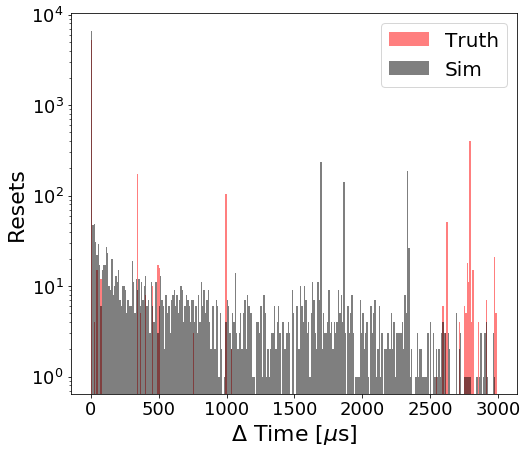

In [3]:
plt.figure(figsize=(8,7))
bins = np.arange(0,3000,10)
#bins = np.arange(100,600,1)

plt.hist(Truth[:,4],bins=bins,rwidth=1,color='r',alpha=0.5,label="Truth")
plt.hist(Sim[:,4],bins=bins,rwidth=1,color='k',alpha=0.5,label="Sim")


plt.legend(loc="upper right", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel(r"$\Delta$ Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.semilogy()
plt.show()

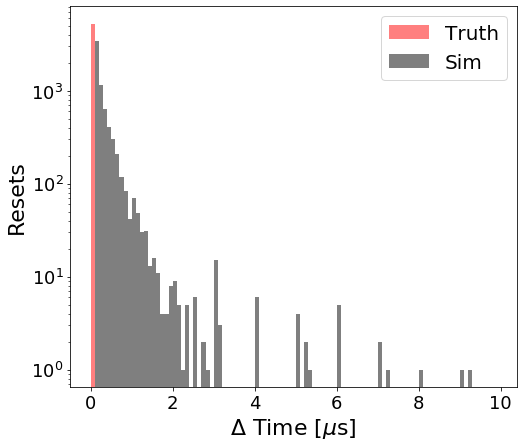

In [4]:
plt.figure(figsize=(8,7))
bins = np.arange(0,10,.1)
#bins = np.arange(100,600,1)

plt.hist(Truth[:,4],bins=bins,rwidth=1,color='r',alpha=0.5,label="Truth")
plt.hist(Sim[:,4],bins=bins,rwidth=1,color='k',alpha=0.5,label="Sim")


plt.legend(loc="upper right", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel(r"$\Delta$ Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.semilogy()
plt.show()

In [5]:
#(coll-true)/coll

In [6]:
Event_Num = 2
keep = np.where(Sim[:,0] == Event_Num)[0]
Sim_Evt = Sim[keep]
keep = np.where(Truth[:,0] == Event_Num)[0]
Tru_Evt = Truth[keep]

In [7]:
Sim_Evt

array([[2.000e+00, 1.200e+02, 1.300e+02, 5.300e+01, 5.300e+01],
       [2.000e+00, 1.200e+02, 1.300e+02, 2.774e+03, 2.721e+03],
       [2.000e+00, 1.200e+02, 1.300e+02, 5.300e+01, 5.300e+01],
       ...,
       [2.000e+00, 1.290e+02, 2.470e+02, 2.500e+01, 2.500e+01],
       [2.000e+00, 1.300e+02, 2.250e+02, 1.100e+01, 1.100e+01],
       [2.000e+00, 1.300e+02, 2.280e+02, 4.000e+00, 4.000e+00]])

In [8]:
Tru_Evt

array([[ 2.00000e+000,  1.24000e+002,  1.10000e+001,  2.33941e+003,
         0.00000e+000],
       [ 2.00000e+000,  1.24000e+002,  1.10000e+001,  2.34081e+003,
        -4.34033e-311],
       [ 2.00000e+000,  1.24000e+002,  1.30000e+001,  2.33920e+003,
         0.00000e+000],
       ...,
       [ 2.00000e+000,  1.28000e+002,  2.15000e+002,  2.34366e+003,
         0.00000e+000],
       [ 2.00000e+000,  1.28000e+002,  2.28000e+002,  2.34102e+003,
         4.60194e+003],
       [ 2.00000e+000,  1.28000e+002,  2.47000e+002,  2.34086e+003,
        -4.34033e-311]])

In [9]:
Hit_X_Pix = np.unique(Sim_Evt[:,1])
Hit_Y_Pix = np.unique(Sim_Evt[:,2])

allpairs = []
for x in range(0,len(Sim_Evt[:,0])):
    xx = Sim_Evt[:,1][x]
    yy = Sim_Evt[:,2][x]
    allpairs.append([xx,yy])
allpairs = np.array(allpairs)
unipairs = np.unique(allpairs, axis=0)
print(len(unipairs))

563


In [10]:
tmp = np.copy(Sim_Evt[:,4])
print(len(tmp))

#tmp[tmp == 0] =1
totQs = 1/tmp
sum(totQs)

3568


13703.286467790545

In [13]:
tmp = np.copy(Tru_Evt[:,4])
print(len(tmp))

#tmp[tmp == 0] =1
totQt = 1/tmp
sum(totQt)

3086


/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in true_divide
  """
/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


nan

In [36]:
(sum(totQs) - sum(totQt))/sum(totQs)

/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [14]:
(len(totQs) - len(totQt))/len(totQs)

0.1350896860986547

In [15]:
Hit_X_Pix = np.unique(Tru_Evt[:,1])
Hit_Y_Pix = np.unique(Tru_Evt[:,2])

allpairs = []
for x in range(0,len(Tru_Evt[:,0])):
    xx = Tru_Evt[:,1][x]
    yy = Tru_Evt[:,2][x]
    allpairs.append([xx,yy])
allpairs = np.array(allpairs)
unipairs = np.unique(allpairs, axis=0)
#print(len(unipairs))

freq = []
for p in unipairs:
    xloc = p[0]
    yloc = p[1]
    hold = 0
    for x in range(0,len(Tru_Evt[:,0])):
        xx = Tru_Evt[:,1][x]
        yy = Tru_Evt[:,2][x]
        if (xx == xloc) and (yy == yloc):
            hold+=1
    freq.append(hold)
freq = np.array(freq)

fmax = np.where(freq == max(freq))[0]
unipairs[fmax]

array([[126., 173.]])

In [16]:
X_Curr = unipairs[fmax][0][0]
Y_Curr = unipairs[fmax][0][1]

In [17]:
T = []
S = []
for x in range(0,len(Tru_Evt[:,0])):
    xx = Tru_Evt[:,1][x]
    yy = Tru_Evt[:,2][x]
    if (xx == X_Curr) and (yy == Y_Curr):
        T.append(Tru_Evt[:,3][x])
        
for x in range(0,len(Sim_Evt[:,0])):
    xx = Sim_Evt[:,1][x]
    yy = Sim_Evt[:,2][x]
    if (xx == X_Curr) and (yy == Y_Curr):
        S.append(Sim_Evt[:,3][x])

T=np.array(T)
S=np.array(S)


In [18]:
max(S)

2410.0

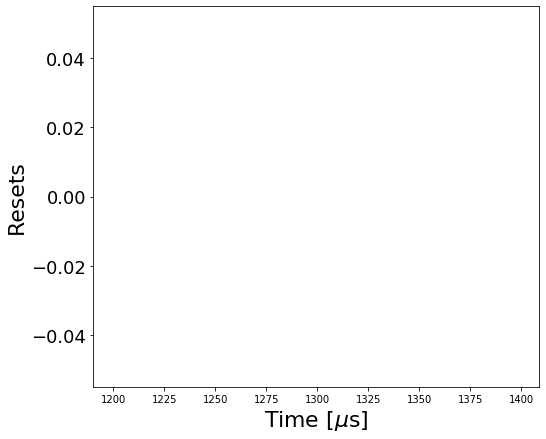

In [19]:
plt.figure(figsize=(8,7))
bins = np.arange(1690,1705,1)
bins = np.arange(0,3000,10)
bins = np.arange(1200,1400,1)

#bins = np.arange(40,60,0.5) ,bins=bins
plt.hist(T,rwidth=0.9,bins=bins,color='r',alpha=0.7)
plt.hist(S,rwidth=0.9,bins=bins,color='k',alpha=0.7)

plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [20]:
bins = np.arange(0,3000,10)
a,b=np.histogram(S,bins=bins)
loc = np.where(a == max(a))[0]
b[loc]

bins = np.arange(b[loc]-100,b[loc]+100,1)


In [21]:
TY,TX = np.histogram(T,bins=bins)
TC = (TX[1:] + TX[:-1])/2

SY,SX = np.histogram(S,bins=bins)
SC = (SX[1:] + SX[:-1])/2

In [22]:
umm = (SY-TY)**2/SY
umm = umm[~np.isnan(umm)]
sum(umm)


/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

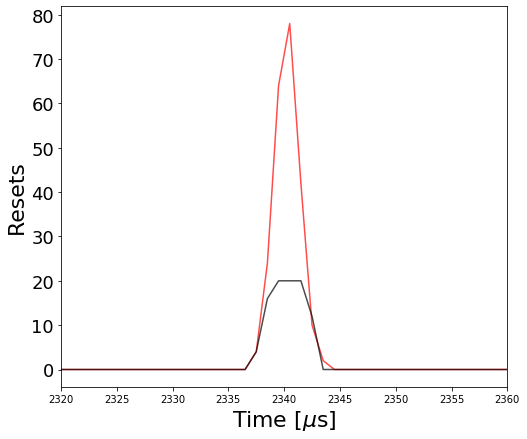

In [23]:
plt.figure(figsize=(8,7))
plt.plot(TC,TY,color='r',alpha=0.7)
plt.plot(SC,SY,color='k',alpha=0.7)

plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)
plt.xlim(b[loc]-20,b[loc]+20)
plt.show()

In [32]:
Event_Num = 2
keep = np.where(Sim[:,0] == Event_Num)[0]
Sim_Evt = Sim[keep]
keep = np.where(Truth[:,0] == Event_Num)[0]
Tru_Evt = Truth[keep]

#Hit_X_Pix = np.unique(Sim_Evt[:,1])
#Hit_Y_Pix = np.unique(Sim_Evt[:,2])

allpairs = []
for x in range(0,len(Sim_Evt[:,0])):
    xx = Sim_Evt[:,1][x]
    yy = Sim_Evt[:,2][x]
    allpairs.append([xx,yy])
allpairs = np.array(allpairs)
unipairs = np.unique(allpairs, axis=0)

In [36]:
chi = []
for fmax in range(0,len(unipairs)):
    X_Curr = unipairs[fmax][0]
    Y_Curr = unipairs[fmax][1]

    T = []
    S = []
    for x in range(0,len(Tru_Evt[:,0])):
        xx = Tru_Evt[:,1][x]
        yy = Tru_Evt[:,2][x]
        if (xx == X_Curr) and (yy == Y_Curr):
            T.append(Tru_Evt[:,3][x])

    for x in range(0,len(Sim_Evt[:,0])):
        xx = Sim_Evt[:,1][x]
        yy = Sim_Evt[:,2][x]
        if (xx == X_Curr) and (yy == Y_Curr):
            S.append(Sim_Evt[:,3][x])

    T=np.array(T)
    S=np.array(S)

    bins = np.arange(0,3000,10)
    a,b=np.histogram(S,bins=bins)
    loc = np.where(a == max(a))[0][0]
    b[loc]

    bins = np.arange(b[loc]-100,b[loc]+100,1)

    TY,TX = np.histogram(T,bins=bins)
    TC = (TX[1:] + TX[:-1])/2

    SY,SX = np.histogram(S,bins=bins)
    SC = (SX[1:] + SX[:-1])/2

    umm = (SY-TY)**2/SY
    umm = umm[~np.isnan(umm)]
    chi.append(sum(umm))
chi = np.array(chi)
keep = np.where(chi <1e300)
chi = chi[keep]
print(sum(chi)/len(chi))

/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide


inf


In [41]:
np.array([1])/np.array([0])

/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([inf])

In [37]:
len(chi)

563

In [29]:
sum(chi)/len(chi)

1.2592475386779183

In [ ]:
unipairs[0]

In [ ]:
loc

In [ ]:
keep = np.where(data[:,4]>0)[0]

In [ ]:
plt.figure(figsize=(8,7))
bins = np.arange(0,20,0.5)
#bins = np.arange(100,600,1)
keep = np.where(data[:,4]>0)[0]
plt.hist(1/data[:,4][keep],bins=bins,color='k',alpha=0.7)

plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)
plt.semilogy()
plt.show()

In [ ]:
plt.scatter(data[:,1]*4, data[:,2]*4,alpha=0.2)

In [ ]:
plt.scatter(data[:,1]*4, data[:,3],alpha=0.2)
#plt.ylim(290,310)

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
DQ = 1/data[:,3]
DQ[DQ<1]=0
size = np.ones(len(DQ))*30
size[DQ<1]=0
#ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=DQ,marker='s',c=DQ, cmap='Reds')
ax.scatter3D(data[:,1]*4, data[:,2]*4, data[:,3],c=DQ, cmap='viridis')

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
#ax.set_zlim(0,1000)
#ax.set_zlim(0,600)
ax.view_init(None, 50)

ax.set_xlabel('X plane [mm]', fontsize=20, rotation=150)
ax.set_ylabel('Y plane [mm]', fontsize=20, rotation=150)
ax.set_zlabel(r'Time [$\mu$s]', fontsize=20, rotation=150)
plt.show()

In [ ]:
allpairs = []
for x in range(0,len(data[:,0])):
    xx = data[:,0][x]
    yy = data[:,1][x]
    allpairs.append([xx,yy])
allpairs = np.array(allpairs)
unipairs = np.unique(allpairs, axis=0)
print(len(unipairs))

freq = []
for p in unipairs:
    xloc = p[0]
    yloc = p[1]
    hold = 0
    for x in range(0,len(data[:,0])):
        xx = data[:,0][x]
        yy = data[:,1][x]
        if (xx == xloc) and (yy == yloc):
            hold+=1
    freq.append(hold)
freq = np.array(freq)

In [ ]:
freq

In [ ]:
ff = np.where(freq > 2)
freq[ff]

In [ ]:
np.where(freq == 3)

In [ ]:
fmax = np.where(freq == max(freq))
unipairs[fmax]

In [ ]:
unipairs[3]

In [ ]:
tes = []
tes2=[]
for x in range(0,len(data[:,0])):
    xx = data[:,0][x]
    yy = data[:,1][x]
    if (xx == 2) and (yy == 245):
        tes.append(data[:,2][x])
        tes2.append(data[:,3][x])

tes=np.array(tes)
tes2=np.array(tes2)

len(tes)

In [ ]:
tes

In [ ]:
plt.figure(figsize=(8,7))
bins = np.arange(2000,2500,1)
#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)
#plt.hist(tes,rwidth=0.9,color='k',alpha=0.7)
#plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [ ]:
plt.figure(figsize=(8,7))
bins = np.arange(2300,2400,1)

#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)

plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [ ]:
plt.figure(figsize=(8,7))
bins = np.arange(2300,2400,1)
#bins = np.arange(100,600,1)

plt.hist(data[:,2],bins=bins,rwidth=0.9,color='k',alpha=0.7)

plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [ ]:
plt.figure(figsize=(8,7))
bins = np.arange(2300,2400,.1)
#bins = np.arange(40,60,0.5)
plt.hist(data[:,2],bins=bins,rwidth=0.9,color='k',alpha=0.7)

a,b = np.histogram(data[:,2],bins=bins)
bc = (b[1:] + b[:-1])/2
plt.scatter(bc,a)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [ ]:
a,b = np.histogram(data[:,2],bins=bins)
bc = (b[1:] + b[:-1])/2

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,bc,a,p0=[1,2340,1])
print(popt)

In [ ]:
xval = bins#np.arange(10,90,0.1)
plt.scatter(bc,a)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')


In [ ]:
(popt[2]**2*E_vel**3)/(2*DiffusionL)

In [ ]:
plt.figure(figsize=(8,7))
bins = np.arange(2320,2350,0.5)
#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)
#plt.hist(tes,rwidth=0.9,color='k',alpha=0.7)
#plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [ ]:
a,b = np.histogram(tes,bins=bins)
bc = (b[1:] + b[:-1])/2

In [ ]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,bc,a,p0=[30,2340,5])
print(popt)

In [ ]:
xval = bins#np.arange(10,90,0.1)
plt.scatter(bc,a)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')


In [ ]:
E_vel = 1.648#; //mm/mus
DiffusionL = 682.23/1e6#;  //mm**2/mus
DiffusionT = 1315.86/1e6#; //mm**2/mus

In [ ]:

(popt[2]**2*E_vel**3)/(2*DiffusionL)

In [ ]:
(popt[2]**2*E_vel**2)/(2*DiffusionL)

In [ ]:
tes = []
tes2=[]
for x in range(0,len(data[:,0])):
    xx = data[:,0][x]
    yy = data[:,1][x]
    if (xx == 126) and (yy == 152):
        tes.append(data[:,2][x])
        tes2.append(1/data[:,3][x])

tes=np.array(tes)
tes2=np.array(tes2)

len(tes)

In [ ]:
plt.scatter(tes,tes2)
plt.xlim(250,350)

In [ ]:
popt,pcov = curve_fit(gaus,tes,tes2,p0=[1,300,1])
print(popt)

In [ ]:
plt.figure(figsize=(7,6))
xval = np.arange(250,350,0.1)
plt.scatter(tes,tes2,color='k',s=50)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')

plt.xlim(290,315)
plt.xlabel(r"Reset time [$\mu$s]",fontsize=20)
plt.ylabel(r"1/$\Delta$t ",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [ ]:
(popt[2]**2*E_vel**3)/(2*DiffusionL)

In [ ]:
(popt[2]**2*E_vel**2)/(2*DiffusionL)

In [ ]:
X=200
Y=321

In [ ]:
idd = X*10000+Y

In [ ]:
idd

In [ ]:
idd/10000

In [ ]:
idd = Y*10000+X
idd

In [ ]:
idd/10000

In [ ]:
0.02*10000

In [ ]:
127206/1000

In [ ]:
0.206*1000